In [1]:
from sklearn.preprocessing import scale, MinMaxScaler
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import seaborn as sns
import pandas as pd

In [3]:
X = np.array([[1,-1,0],[2,0,0],[0,1,-1]])
print(X)
moy = np.mean(X)
print(moy)
var = np.var(X)
print(var)

[[ 1 -1  0]
 [ 2  0  0]
 [ 0  1 -1]]
0.2222222222222222
0.8395061728395062


In [5]:
normalizedX = scale(X, axis=0, with_mean=True, with_std=True, copy=True)
print(normalizedX)
# Les valeurs de la matrice X sont changees
moy2 = np.mean(normalizedX)
var2 = np.var(normalizedX)
print(moy2)
print(var2)
# Les donnees suivent une distribution normale centree reduite

[[ 0.         -1.22474487  0.70710678]
 [ 1.22474487  0.          0.70710678]
 [-1.22474487  1.22474487 -1.41421356]]
-2.4671622769447922e-17
0.9999999999999998


In [8]:
X2 = np.array([[1,-1,2],[2,0,0],[0,1,-1]])
print("Affichage matrice X2: \n", X2)
moy = X2.mean(0)
print("Moyenne de X2:",moy)
scaler = MinMaxScaler(feature_range=(0, 1), copy=True)
# 
normalizedX2 = scaler.fit(X2)

print("X2 normalisee: \n", normalizedX2.transform(X2))
# Les valeur de la matrice X2 sont transformer et comprisent entre 0 et 1

Affichage matrice X2: 
 [[ 1 -1  2]
 [ 2  0  0]
 [ 0  1 -1]]
Moyenne de X2: [1.         0.         0.33333333]
X2 normalisee: 
 [[0.5        0.         1.        ]
 [1.         0.5        0.33333333]
 [0.         1.         0.        ]]


Text(0.5, 1.0, 'Génération de données et affichage')

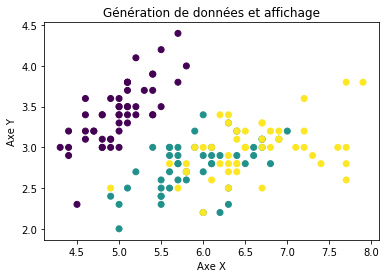

In [10]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

plt.figure()
plt.scatter(iris.data[:,0], iris.data[:,1], c=iris.target)
axes = plt.gca()
plt.ylabel('Axe Y')
plt.xlabel('Axe X')
plt.title("Génération de données et affichage")

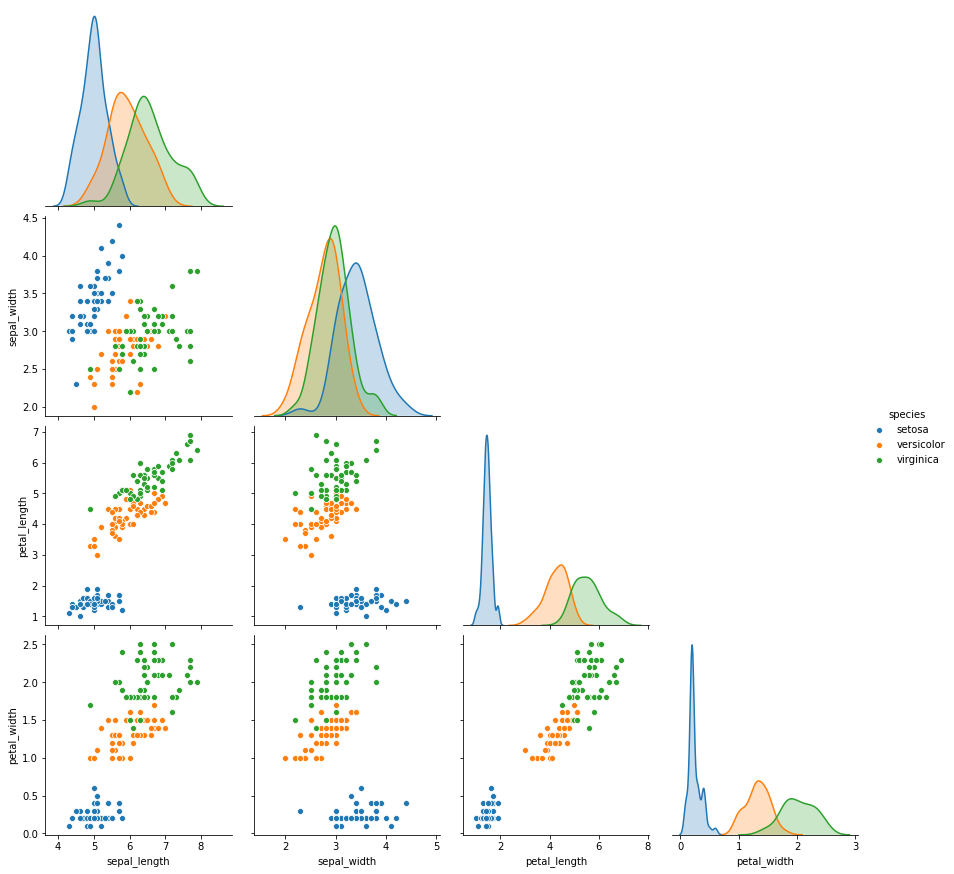

In [119]:
df = sns.load_dataset("iris")
sns.pairplot(df, hue="species", corner=True, height=3)
# Les plots 5 et 6 sont mieux separees par rapport aux autres car les classes sont moins correlees

No handles with labels found to put in legend.
No handles with labels found to put in legend.


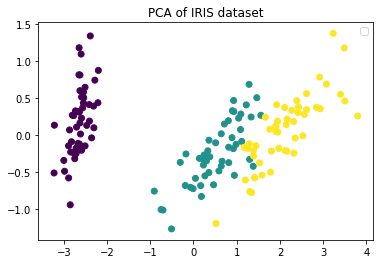

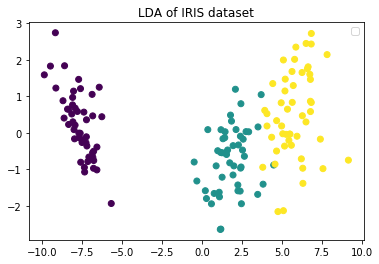

In [23]:
X = iris.data
y = iris.target

lda = LDA()
fitLDA = lda.fit(X, y)
IrisLDA = fitLDA.transform(X)

pca = PCA()
fitPCA = pca.fit(X, y)
IrisPCA = fitPCA.transform(X)

# ,label = ['setosa', 'versicolor', 'virginica']
plt.figure()
plt.scatter(IrisPCA[:,0], IrisPCA[:,1], c=y)
plt.legend()
plt.title('PCA of IRIS dataset')

plt.figure()
plt.scatter(IrisLDA[:,0], IrisLDA[:,1], c=y)
plt.legend()
plt.title('LDA of IRIS dataset')


# plt.figure()
# for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
#     plt.scatter(IrisPCA[y == i, 0], IrisPCA[y == i, 1], c=c, label=target_name)
# plt.legend()
# plt.title('PCA of IRIS dataset')

# plt.figure()
# for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
#     plt.scatter(IrisLDA[y == i, 0], IrisLDA[y == i, 1], c=c, label=target_name)
# plt.legend()
# plt.title('LDA of IRIS dataset')

plt.show()
# Les donnees sont bien separer pour les deux méthodes, mais on voit que pour LDA est mieux que LCA car 
# LDA fonctionne de telle sorte pour maximiser la distance entre la moyenne des classes.

# Les donnees sont bien separer pour LDA mieux que PCA
# LDA cherche a optimiser la distance entre les moyennes et les ecarts-types des classes.
